In [1]:
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
from bs4 import BeautifulSoup
import seaborn as sns
from IPython.display import display
import os
os.environ["PROJ_LIB"] = r'C:\Users\blmalumi\AppData\Local\Continuum\anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

%matplotlib inline

tweets = pd.read_csv('xenophobia.csv', encoding = "ISO-8859-1")


CLEANING THE DATA

In [2]:
#Preprocessing del RT @blablabla:
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


print(tweets['text'][1])

I'll believe this shit when I see it. These folks ignored a bunch of red flags like racism, xenophobia, Islamophobiâ¦


In [3]:
# tweets['text'] = tweets['text'].apply(lambda x: re.sub('[!@$:).;,?&]', '', x.lower()))
# tweets['text'] = tweets['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['text'][1]

"I'll believe this shit when I see it. These folks ignored a bunch of red flags like racism, xenophobia, Islamophobiâ\x80¦"

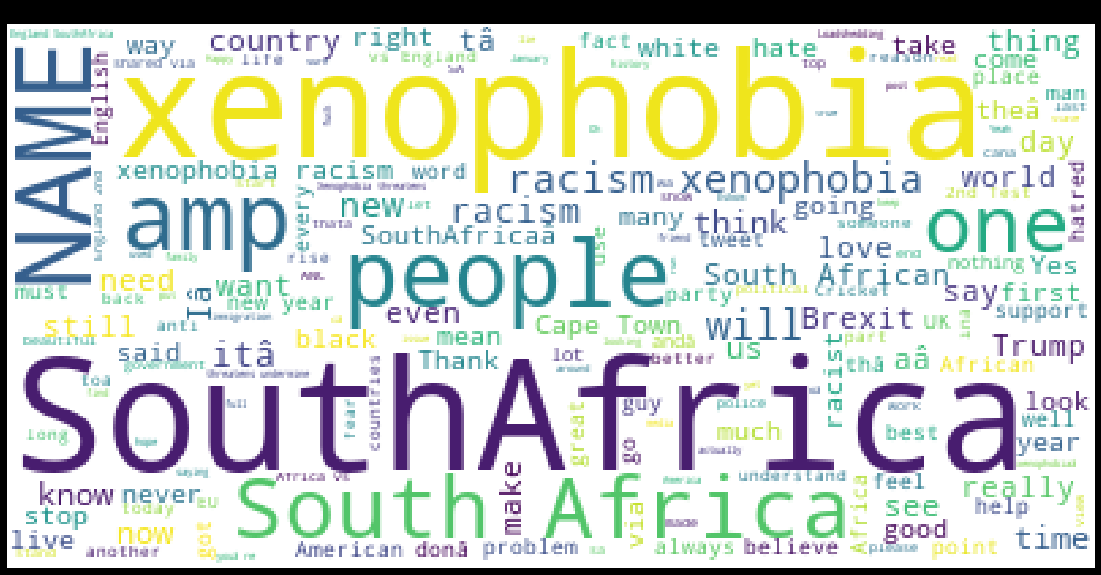

In [4]:
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")
wordcloud(tweets,'text')

In [5]:
# tweets['country'] = tweets['country'].apply(lambda x: x.lower())
# tweets['country'].replace('states united','united states',inplace=True)
# tweets['country'].replace('united states','usa',inplace=True)
# tweets['country'].replace('united Kingdom','uk',inplace=True)
# tweets['country'].replace('republic philippines','philippines republic',inplace=True)
# wordcloud(tweets, 'country')

In [6]:

tweets['source'][3]

'Twitter for iPhone'

In [7]:




tweets['source'].head()

0    Twitter for Android
1    Twitter for Android
2    Twitter for Android
3     Twitter for iPhone
4       Twitter for iPad
Name: source, dtype: object

source
ANC Media Mentions              1792
Aardnews                          43
ActualityFeed Tweet Machine      963
AddisNews                       2053
AgoraPulse Manager               584
                               ...  
showoff_ebooks                    36
tweetomizer.com                13360
tweetvoterproblems                 7
twittbot.net                    8502
warauha                         3044
Name: followers_count, Length: 130, dtype: int64


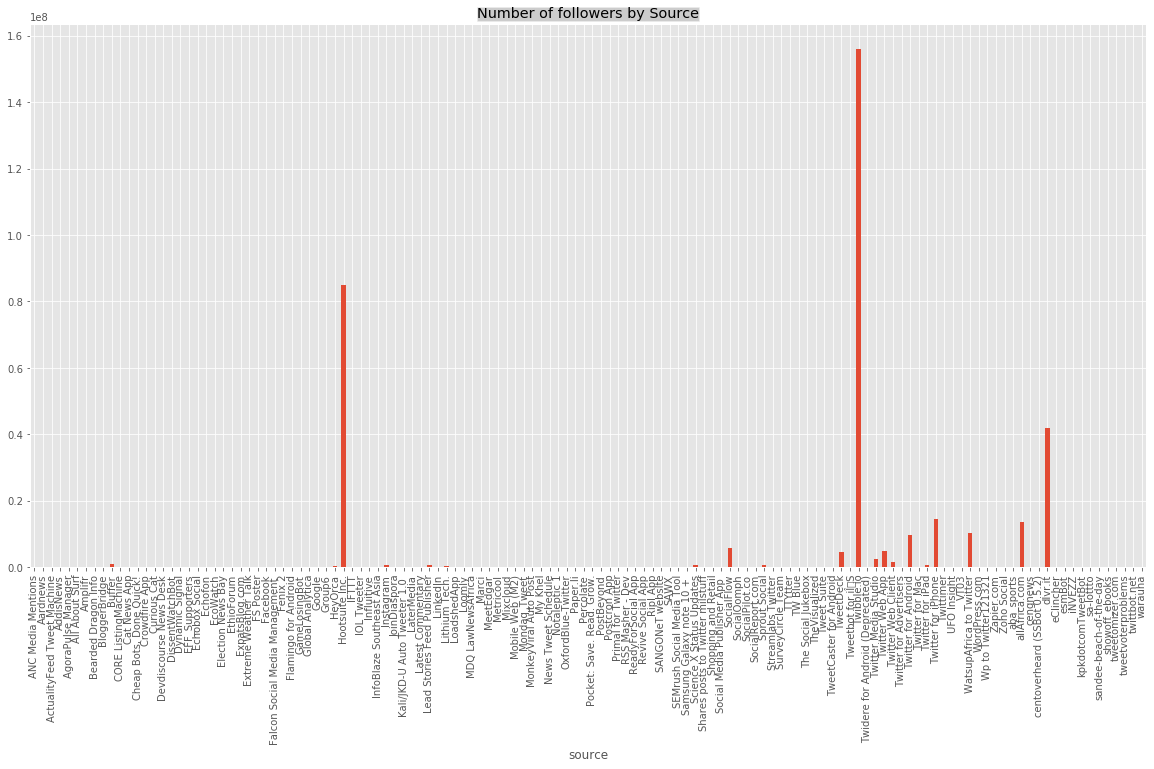

In [8]:
tweets_by_type = tweets.groupby(['source'])['followers_count'].sum()
print(tweets_by_type)
plt.title('Number of followers by Source', bbox={'facecolor':'0.8', 'pad':0})
tweets_by_type.transpose().plot(kind='bar',figsize=(20, 10))

In [9]:
tweets.describe()

,Unnamed: 0,retweet_count,id_str,in_reply_to_status_id_str,in_reply_to_user_id,listed_count,statuses_count,followers_count,favourites_count,time_zone
count,8000.000000,8000.000000,8.000000e+03,3.388000e+03,3.519000e+03,8000.000000,8.000000e+03,8.000000e+03,8000.000000,0.0
mean,1999.500000,1.841125,1.212058e+18,1.210864e+18,3.684118e+17,153.183500,5.557179e+04,4.465557e+04,17362.248625,NaN
std,1154.772678,15.386852,1.455299e+15,4.512944e+15,4.982355e+17,870.884742,1.555766e+05,3.224858e+05,42341.087765,NaN
min,0.000000,0.000000,1.209480e+18,9.968090e+17,3.840000e+03,0.000000,1.000000e+00,0.000000e+00,0.000000,NaN
25%,999.750000,0.000000,1.210750e+18,1.210238e+18,1.580015e+08,0.000000,1.579000e+03,1.080000e+02,336.000000,NaN
50%,1999.500000,0.000000,1.212215e+18,1.210900e+18,1.957126e+09,5.000000,8.194000e+03,5.260000e+02,2911.500000,NaN
75%,2999.250000,0.000000,1.213410e+18,1.211370e+18,9.330000e+17,40.000000,3.372150e+04,2.667500e+03,15189.750000,NaN
max,3999.000000,674.000000,1.214090e+18,1.214090e+18,1.210000e+18,52666.000000,1.562490e+06,5.668252e+06,905092.000000,NaN


source_new2
Hootsuite Inc.          85032512
Instagram                 663160
LinkedIn                   17616
Others                  89763440
Twibble.io             155883360
Twitter Web Client       1598931
Twitter for Android      9829375
Twitter for iPhone      14456184
Name: , dtype: int64


Text(0.5, 1.0, 'Number of followers by Source bis')

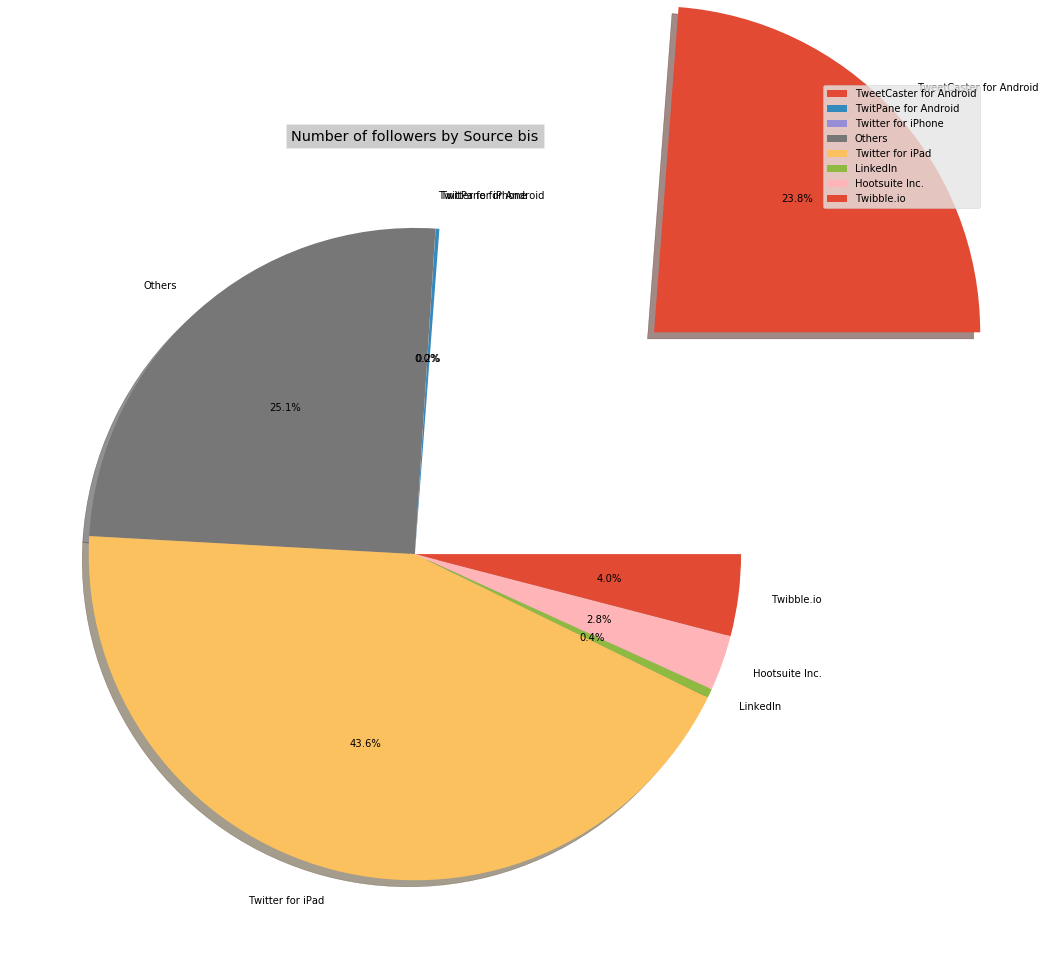

In [10]:
tweets['source_new2'] = ''
labels = ['TweetCaster for Android' ,'TwitPane for Android','Twitter for iPhone','Others','Twitter for iPad','LinkedIn','Hootsuite Inc.','Twibble.io']
labels = list(labels)
for i in range(len(tweets['source'])):
    if tweets['source'][i] not in ['Twitter for Android','Instagram','Twitter Web Client','Twitter for iPhone','LinkedIn','Hootsuite Inc.','Twibble.io']:
        tweets['source_new2'][i] = 'Others'
    else:
        tweets['source_new2'][i] = tweets['source'][i] 

tweets_by_type2 = tweets.groupby(['source_new2'])['followers_count'].sum()

tweets_by_type2.rename("",inplace=True)
explode = [1, 0, 0, 0, 0, 0,0,0]
explode = list(explode)
print(tweets_by_type2.transpose())
tweets_by_type2.transpose().plot(kind='pie',figsize=(20, 15),autopct='%1.1f%%',shadow=True,explode=explode, labels=labels)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of followers by Source bis', bbox={'facecolor':'0.8', 'pad':5})

In [11]:
# plt.figure( figsize=(20,10), facecolor='k')
# m = Basemap(projection='mill',resolution=None,llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
# m.etopo()
# xpt,ypt = m(np.array(tweets['place_lon']),np.array(tweets['place_lat']))
# lon,lat = m(xpt,ypt,inverse=True)
# m.plot(xpt,ypt,'ro',markersize=np.sqrt(5)) 
# plt.title('Repartition on the globe', bbox={'facecolor':'0.8', 'pad':3})
# plt.show()

In [12]:
tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
sid = SentimentIntensityAnalyzer()
tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

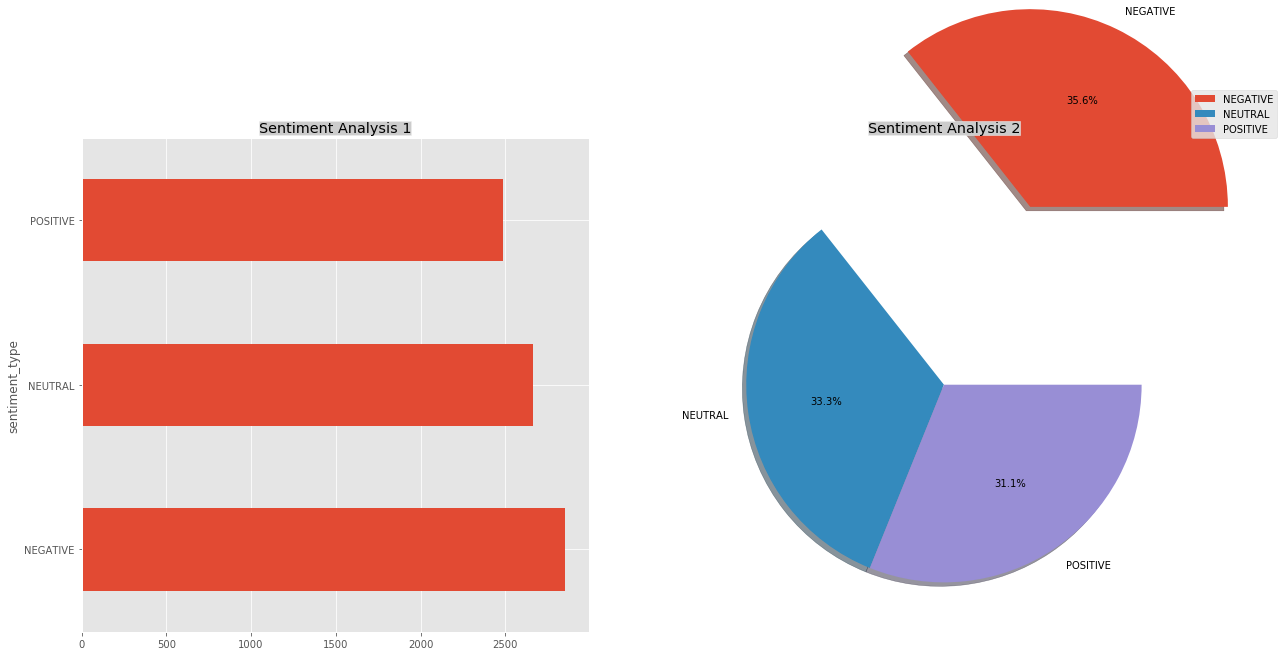

In [13]:
tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [14]:
tweets[tweets.sentiment_type == 'NEGATIVE'].text.reset_index(drop = True)[0:5]

0    I'll believe this shit when I see it. These fo...
1    This former Tory MP says in his first sentence...
2                        I was not party political.â¦
3    That history? A litany of terror and bloodshed...
4    When 'patriotism' is so often used as camoufla...
Name: text, dtype: object

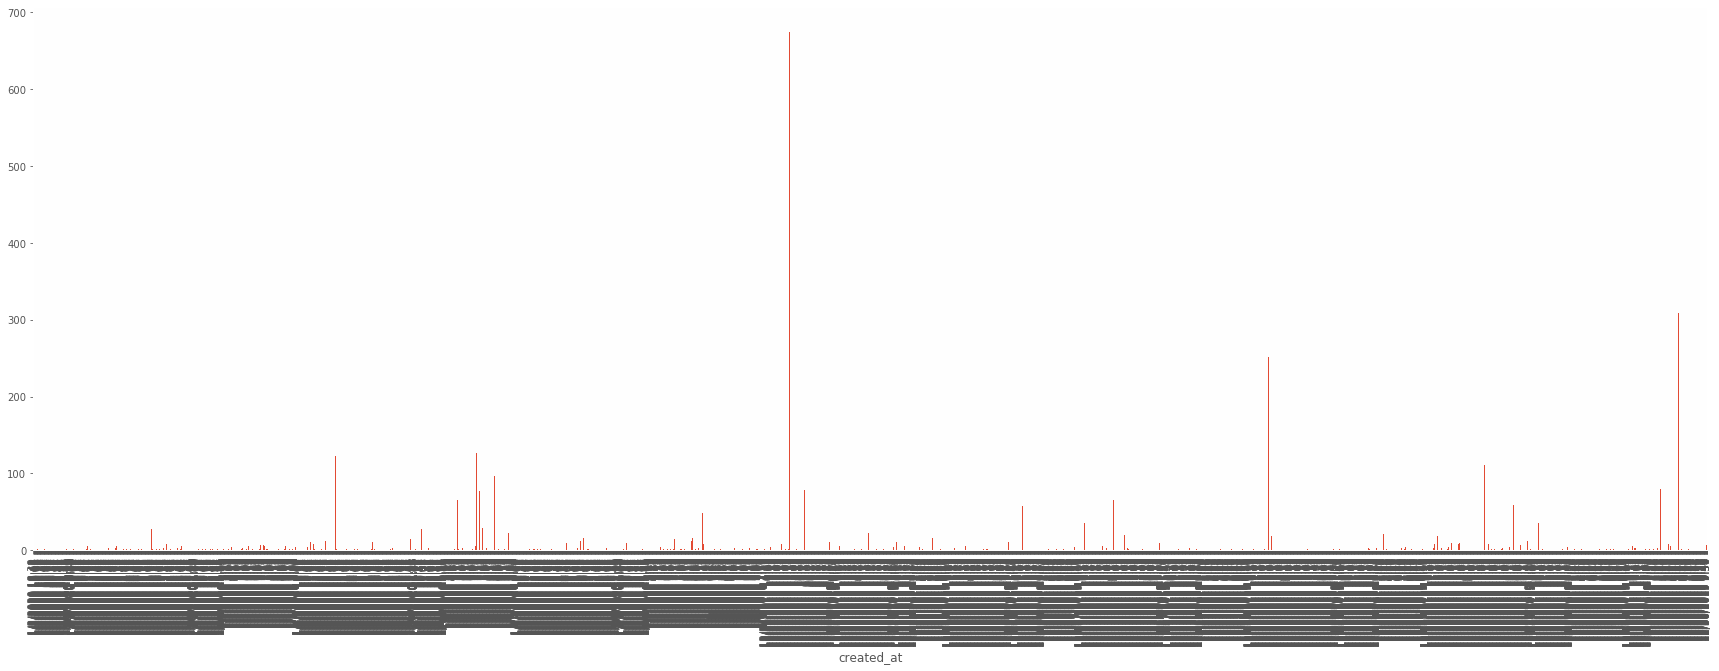

In [15]:
new_tweets= tweets.groupby(['created_at'])['retweet_count'].sum()
new_tweets
new_tweets.transpose().plot(kind='bar',figsize=(30, 10))

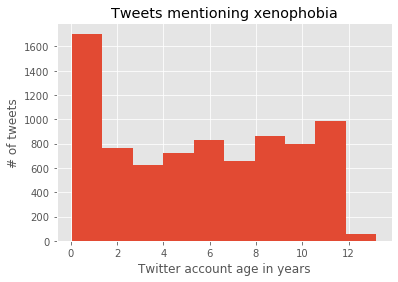

In [29]:
from datetime import datetime

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)


plt.hist(tweets["user_age"])
plt.title("Tweets mentioning xenophobia")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

In [17]:
#fill missing value for contries

tweets['location'].fillna(tweets['location'].mode()[0], inplace=True)

In [18]:
tweets['location'].value_counts()

South Africa                        2710
Johannesburg, South Africa           323
Africa.                              185
Cape Town, South Africa              133
Cape Town                             73
                                    ... 
Carthage                               1
Worldwide                              1
Durban - South Africa                  1
 Germany and Kashmir                   1
Way Down in Dixie, USA ðºð¸        1
Name: location, Length: 2420, dtype: int64

In [19]:
tweets.isnull().sum()

Unnamed: 0                        0
user_created                      0
text                              0
retweet_count                     0
favorited                         0
truncated                         0
id_str                            0
in_reply_to_screen_name        4481
source                            0
retweeted                         0
created_at                        0
in_reply_to_status_id_str      4612
in_reply_to_user_id            4481
lang                              0
listed_count                      0
verified                          0
location                          0
statuses_count                    0
followers_count                   0
favourites_count                  0
protected                         0
time_zone                      8000
user_url                       4553
tweetos                           0
source_new2                       0
text_lem                          0
sentiment_compound_polarity       0
sentiment_neutral           

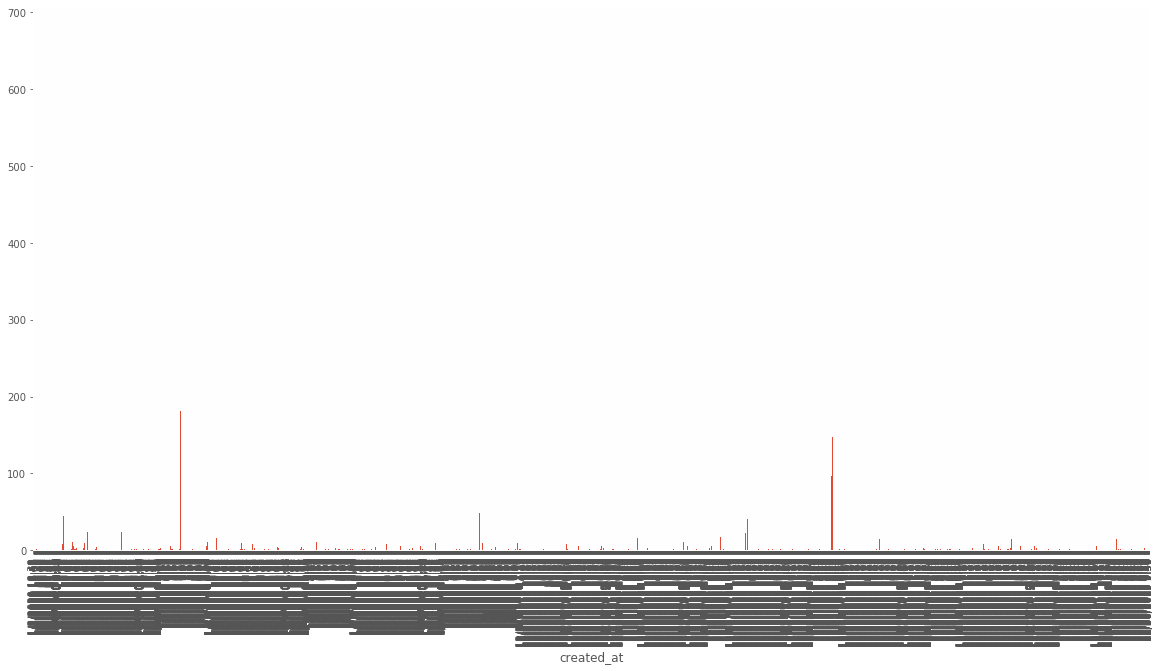

In [20]:
loc_tweets= tweets.groupby(['location'])['retweet_count'].sum()
new_tweets
new_tweets.transpose().plot(kind='bar',figsize=(20, 10))

In [21]:
frq = tweets['location'].value_counts()/tweets.shape[0]
combine = frq.loc[frq.values < 0.0005].index
print(combine)
# for cat in combine:
#     tweets['location'].replace({cat:'Others'},inplace=True) 

Index(['NO LISTS!', 'Cupids Crossroads', 'Vancouver, British Columbia',
       'Pretoria South Africa ', 'Pretoria South Africa',
       'Bridge Street Walton-on-Thames', 'South Carolina, USA',
       'Untied Kingdom', 'Melbourne, Victoria', 'East, England',
       ...
       'South Africa - JHB', 'a secret lair in Texas', 'Embu & Nairobi, Kenya',
       'Croft', 'United Kingdom,Kent.', 'Carthage', 'Worldwide ',
       'Durban - South Africa', ' Germany and Kashmir',
       'Way Down in Dixie, USA ðºð¸ '],
      dtype='object', length=2240)


In [22]:
var = list(tweets.dtypes.loc[tweets.dtypes=='object'].index)
var

['text',
 'in_reply_to_screen_name',
 'source',
 'lang',
 'location',
 'user_url',
 'tweetos',
 'source_new2',
 'text_lem',
 'sentiment_type']

In [23]:
[tweets['location'].value_counts()]

[South Africa                        2710
 Johannesburg, South Africa           323
 Africa.                              185
 Cape Town, South Africa              133
 Cape Town                             73
                                     ... 
 Carthage                               1
 Worldwide                              1
 Durban - South Africa                  1
  Germany and Kashmir                   1
 Way Down in Dixie, USA ðºð¸        1
 Name: location, Length: 2420, dtype: int64]

In [24]:
tweets['country1'] = tweets['location']
tweets['country1'].replace('Johannesburg, South Africa','South Africa',inplace=True)
tweets['country1'].replace('Cape Town South Africa','South Africa',inplace=True)
tweets['country1'].replace('Cape Town','South Africa',inplace=True)

tweets['country1'].value_counts()

South Africa                        3113
Africa.                              185
Cape Town, South Africa              133
Pretoria, South Africa                62
United States                         61
                                    ... 
Worldwide                              1
Durban - South Africa                  1
 Germany and Kashmir                   1
Bruxelles, Belgique                    1
Way Down in Dixie, USA ðºð¸        1
Name: country1, Length: 2417, dtype: int64

In [25]:
frq = tweets['country1'].value_counts()/tweets.shape[0]
combine = frq.loc[frq.values < 0.0004].index

for cat in combine:
    tweets['country1'].replace({cat:'Others'},inplace=True) 

In [26]:
tweets['country1'].value_counts()


South Africa                                3113
Others                                      2692
Africa.                                      185
Cape Town, South Africa                      133
Pretoria, South Africa                        62
                                            ... 
Kempton Park, Johannesburg, South Africa       4
Liverpool, England                             4
Denver, CO                                     4
southafrica                                    4
South West, England                            4
Name: country1, Length: 178, dtype: int64

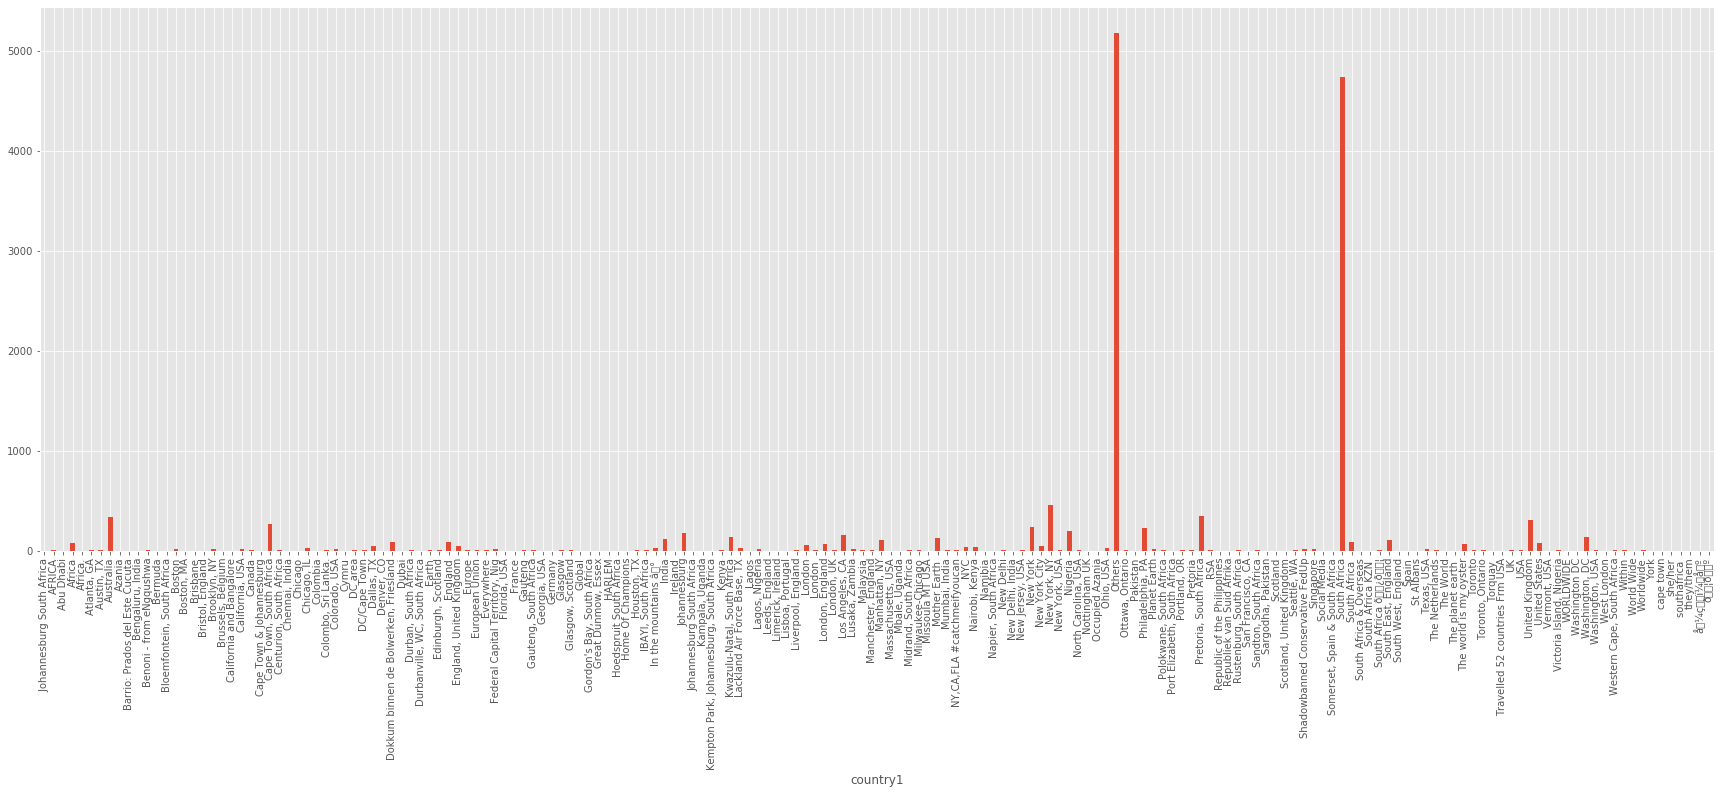

In [30]:
new_tweets= tweets.groupby(['country1'])['retweet_count'].sum()
new_tweets
new_tweets.transpose().plot(kind='bar',figsize=(30, 10))

In [ ]:
tweets['country1'].value_counts()
